In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

import numpy as np
import pandas as pd

In [3]:
module_path = os.path.abspath("../")
sys.path.append(module_path) #add parent directory to path to detect the modules

In [4]:
STORE_ENV = 'DATA_STORE_PATH'
os.environ[STORE_ENV] = './tmp/nhl' #set data store path as environment variable

In [5]:
path = os.environ.get(STORE_ENV)

In [12]:
COMET_API_KEY = 'COMET_API_KEY'
#os.environ[COMET_API_KEY] = ''

In [7]:
from ift6758.feature import transform_features

**Load clean train data**

In [8]:
df = pd.read_csv(f'{path}/nhl_data_clean_train.csv')
train_df = transform_features(df)
train_df.head()

,Unnamed: 0,date_time,season,game_id,game_type,game_seconds,period,period_time,period_seconds,event_type,...,shot_distance,shot_angle,distance_from_prev_event,time_from_prev_event,rebound,change_in_angle,speed,shot_type,empty_net,strength
0,0,2015-10-07T23:24:23Z,2015-2016,2015020001,R,51,1,00:51,51,0,...,34.53,10.01,154.28,11,0,0.00,14.03,7,0,Even
1,1,2015-10-07T23:24:38Z,2015-2016,2015020001,R,65,1,01:05,65,0,...,10.00,0.00,50.48,7,0,0.00,7.21,4,0,Even
2,2,2015-10-07T23:27:21Z,2015-2016,2015020001,R,66,1,01:06,66,0,...,14.04,4.09,4.12,1,1,4.09,4.12,4,0,Even
3,3,2015-10-07T23:25:24Z,2015-2016,2015020001,R,113,1,01:53,113,0,...,49.52,46.64,79.61,18,0,0.00,4.42,7,0,Even
4,4,2015-10-07T23:27:08Z,2015-2016,2015020001,R,157,1,02:37,157,0,...,28.02,2.05,22.47,5,0,0.00,4.49,5,0,Even


**Load clean test data**

In [10]:
df = pd.read_csv(f'{path}/nhl_data_clean_test.csv')
test_df = transform_features(df)
test_df.head(5)

,Unnamed: 0,date_time,season,game_id,game_type,game_seconds,period,period_time,period_seconds,event_type,...,shot_distance,shot_angle,distance_from_prev_event,time_from_prev_event,rebound,change_in_angle,speed,shot_type,empty_net,strength
0,0,2019-10-02T23:15:32Z,2019-2020,2019020001,R,25,1,00:25,25,1,...,4.12,14.04,85.01,25,0,0.0,3.40,5,0,Even
1,1,2019-10-02T23:18:23Z,2019-2020,2019020001,R,91,1,01:31,91,0,...,57.04,2.01,29.27,27,0,0.0,1.08,4,0,Even
2,2,2019-10-02T23:20:45Z,2019-2020,2019020001,R,203,1,03:23,203,0,...,26.68,12.99,127.02,14,0,0.0,9.07,4,0,Even
3,3,2019-10-02T23:21:17Z,2019-2020,2019020001,R,236,1,03:56,236,0,...,36.06,33.69,93.00,6,0,0.0,15.50,7,0,Even
4,4,2019-10-02T23:22:36Z,2019-2020,2019020001,R,287,1,04:47,287,0,...,55.23,31.68,55.00,6,0,0.0,9.17,3,0,Even


# Model Plots

In [14]:
from ift6758.utils import Comet
from ift6758.model import *
from ift6758.viz import *



In [20]:
comet = Comet()

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn, shap, xgboost. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/ds-team-9/ift6758-project/316e2912347e4f0ba02aa575875fe9c3



## Logistic Regression

In [ ]:
#Comet("Logistic Regression") #Starts an experminet in comet.ml

Accuracies: {'distance': 0.9073258542543958}


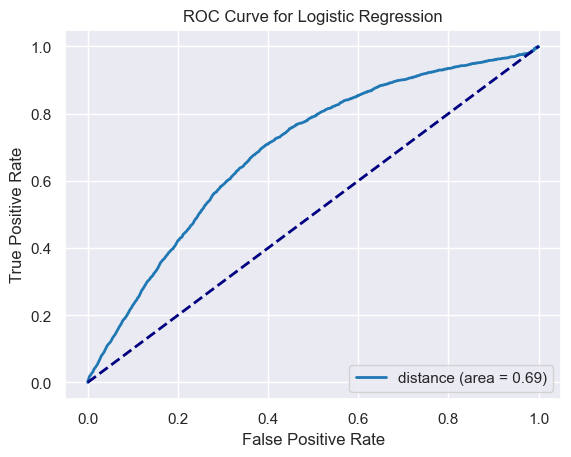

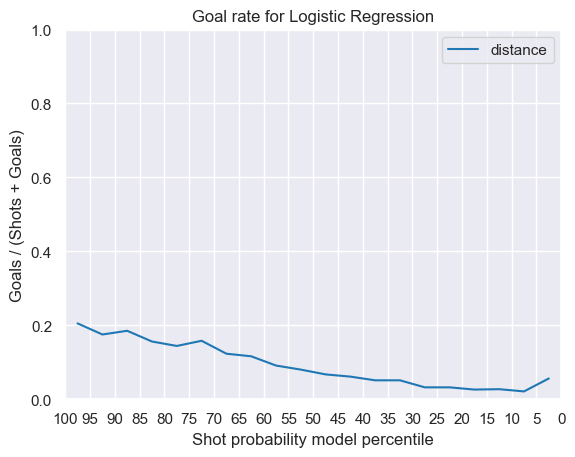

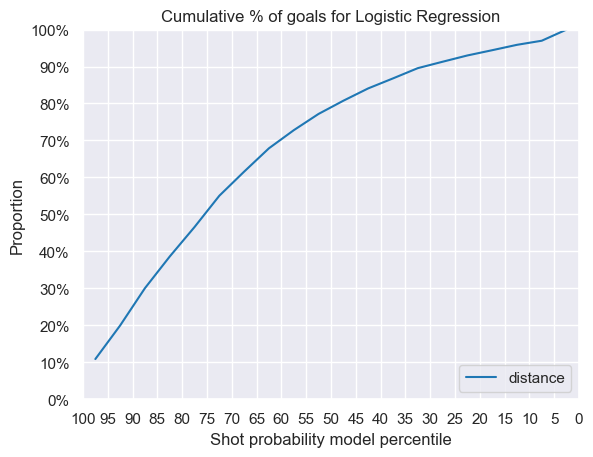

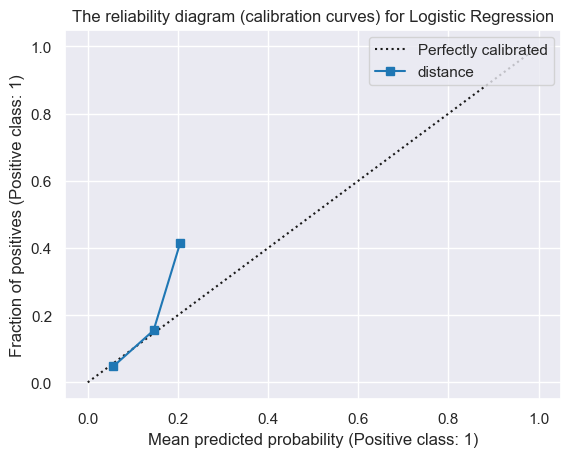

In [80]:
clf, res = train_lr_with_distance(train_df)
evaluate_base_models([res], labels=['distance'])


Accuracies: {'distance': 0.906040052717863}


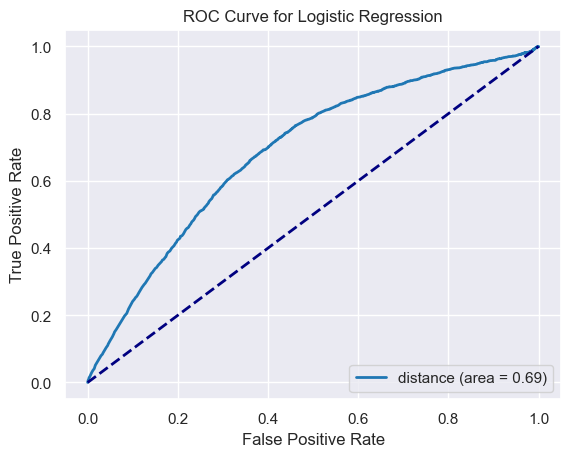

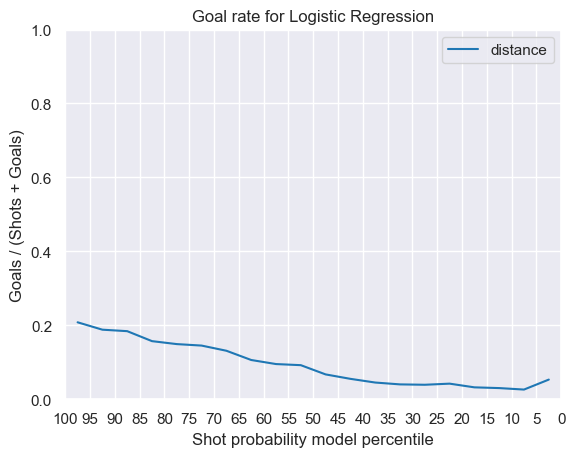

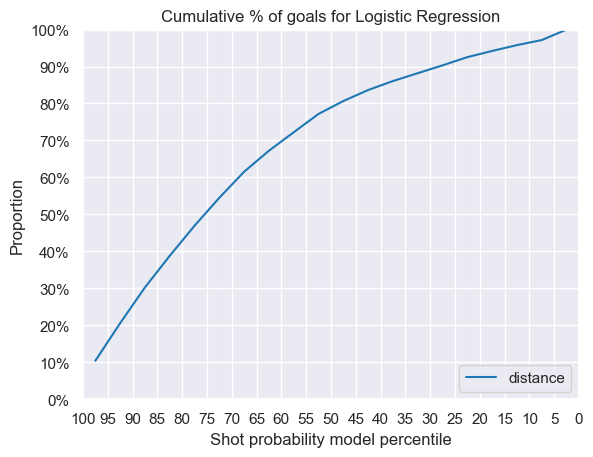

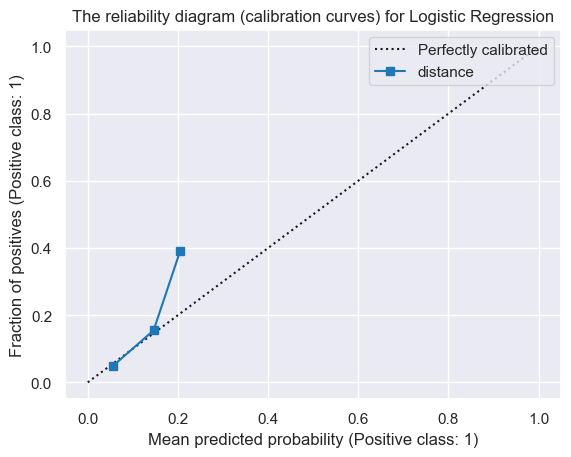

In [92]:
#models, res = train_base_models(train_df)
evaluate_base_models(res[:1], labels = ['distance'])

### Test LR Models

Accuracies: {'distance': 0.9035821622938836, 'angle': 0.9035821622938836, 'distance and angle': 0.9035821622938836, 'uniform': 0.5006769014160778}


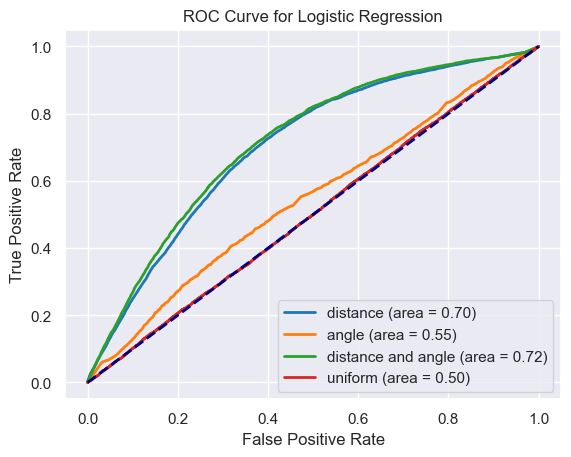

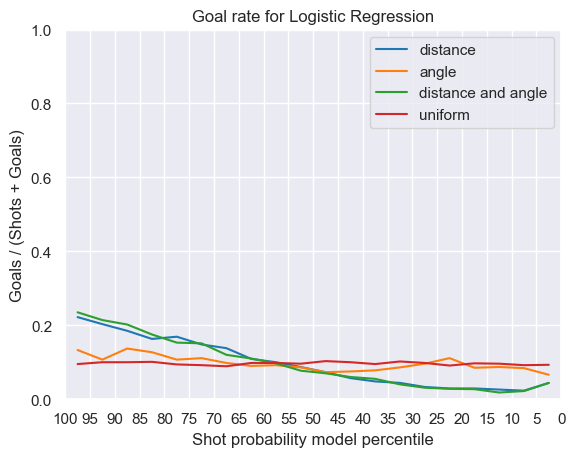

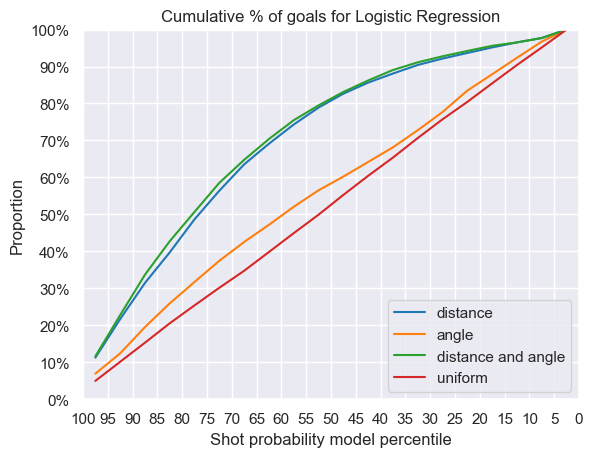

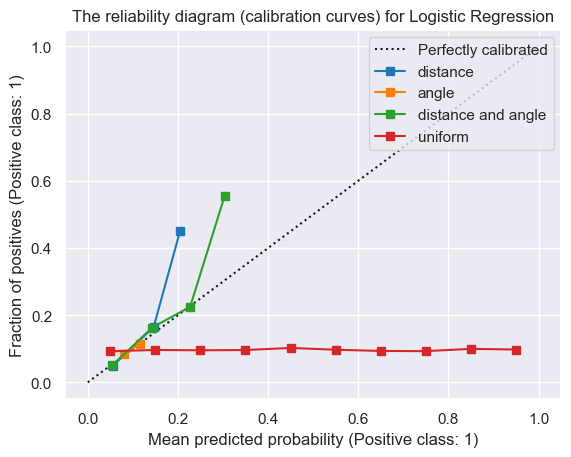

In [89]:
results = test_base_models(models, test_df)
evaluate_base_models(results)

## XGBoost

In [84]:
from xgboost import XGBClassifier

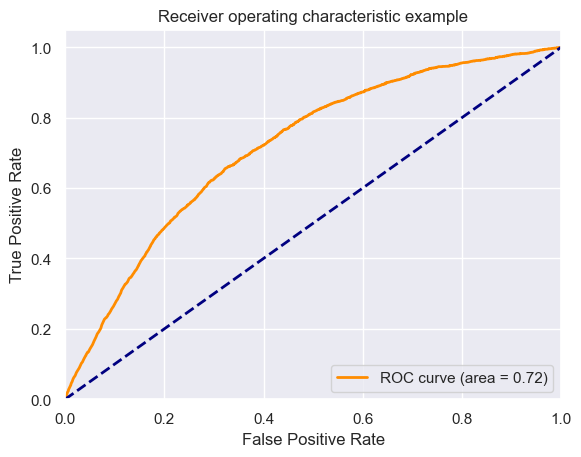

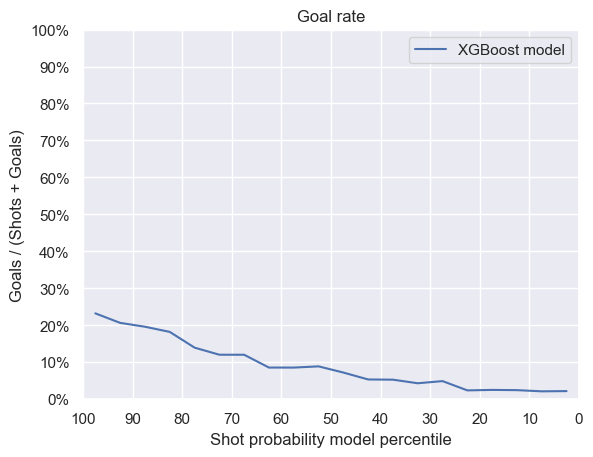

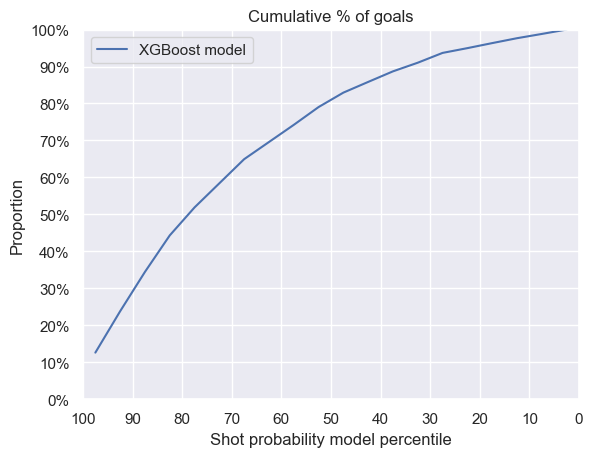

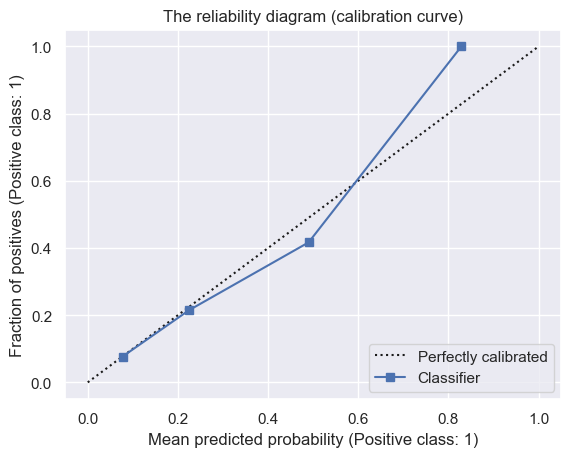

In [85]:
# 1. train xgboost model with two features
# create model instance
xgb_model = XGBClassifier()

xgboost_model, roc_auc = train_xgboost(train_df, ['shot_distance', 'shot_angle'], xgb_model)

In [86]:
feat_list = ['game_seconds', 'period', 'coord_x', 'coord_y', 'shot_distance', 'shot_angle', 'shot_type', 'prev_event_type', 'prev_coord_x', 'prev_coord_y', 
        'time_from_prev_event', 'distance_from_prev_event', 'rebound', 'change_in_angle', 'speed', 'empty_net']

#feats = train_df[feat_list]
#label = train_df[['event_type']]
feats, label = sep_feature_target(train_df, feat_list)

In [ ]:
# 2.1. hyperparameters tuning
clf = hp_tuning(feats, label)

### Hyperparameters tuning results

In [ ]:
hp_tuning_plot(clf)

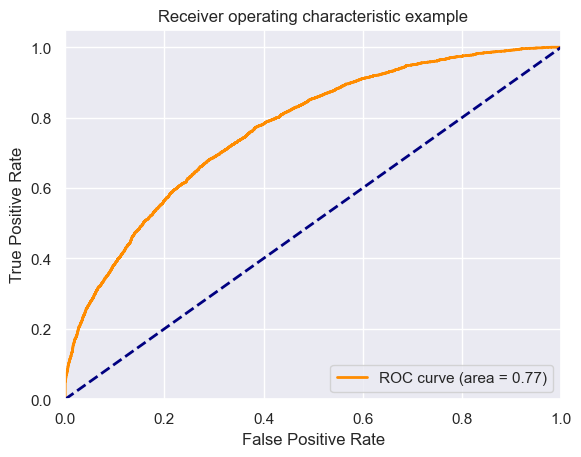

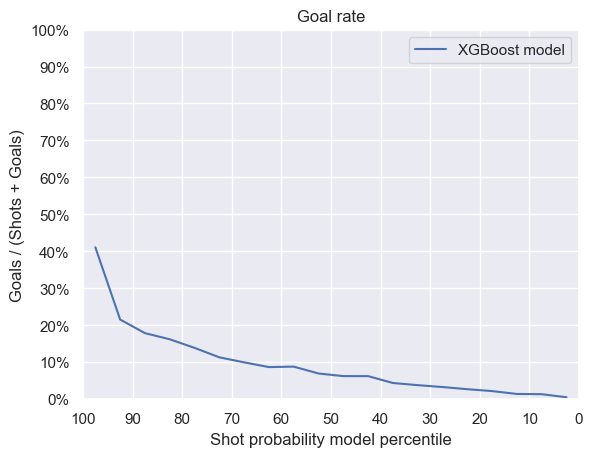

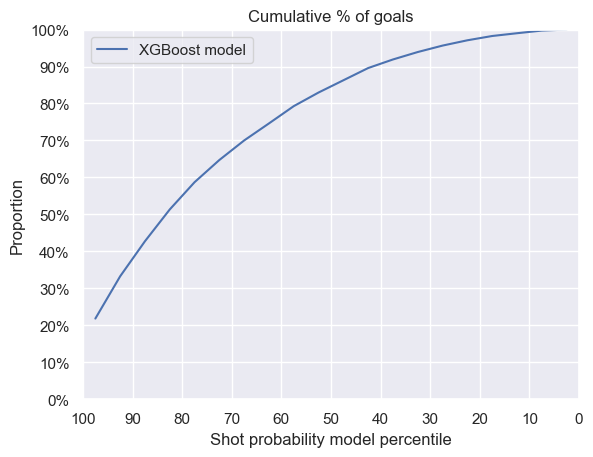

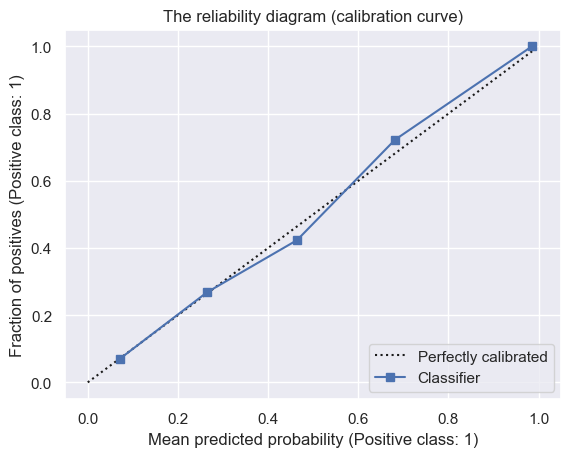

In [21]:
# 2.2 train classifier with all of the features
# create model instance
xgb_model = XGBClassifier(booster='dart', eta=0.05, eval_metric='auc', max_depth=10, objective='binary:logistic', seed=1337, subsample=0.5)

xgboost_model, roc_auc = train_xgboost(train_df, feat_list, xgb_model)

In [ ]:
# save model and log to comet.ml
model_path = "xgboost_all_feats.json"
xgboost_model.save_model(model_path)

log_to_comet(model_path, roc_auc)

In [20]:
# 3.1 feature selection
from ift6758.feature import univariate, recursive, l1_method, tree_based, shap

In [ ]:
feats_new = univariate(feats, label) #  (ValueError: Input X must be non-negative.)

In [ ]:
recursive(feats, label)

In [22]:
feats_new = l1_method(feats, label)    # 16 -> 14
len(feats_new[0,: ])

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
X has feature names, but SelectFromModel was fitted without feature names


14

In [23]:
feats_new, tree_model = tree_based(feats, label)    # 16 -> 10
feats_new[:5, :]

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
X has feature names, but SelectFromModel was fitted without feature names


array([[ 51.  , -55.  ,   6.  ,  34.53,  10.01,  94.  , -34.  ,  11.  ,
        154.28,  14.03],
       [ 65.  , -79.  ,   0.  ,  10.  ,   0.  , -37.  , -28.  ,   7.  ,
         50.48,   7.21],
       [ 66.  , -75.  ,  -1.  ,  14.04,   4.09, -79.  ,   0.  ,   1.  ,
          4.12,   4.12],
       [113.  , -55.  , -36.  ,  49.52,  46.64, -91.  ,  35.  ,  18.  ,
         79.61,   4.42],
       [157.  , -61.  ,  -1.  ,  28.02,   2.05, -69.  , -22.  ,   5.  ,
         22.47,   4.49]])

In [ ]:
# shaq(feats, label)

In [26]:
df_selected = pd.DataFrame(feats_new)

In [ ]:
# hyperparameters tuning
clf = hp_tuning(df_selected, label)

In [ ]:
# plot hyperparameters tuning results
hp_tuning_plot(clf)

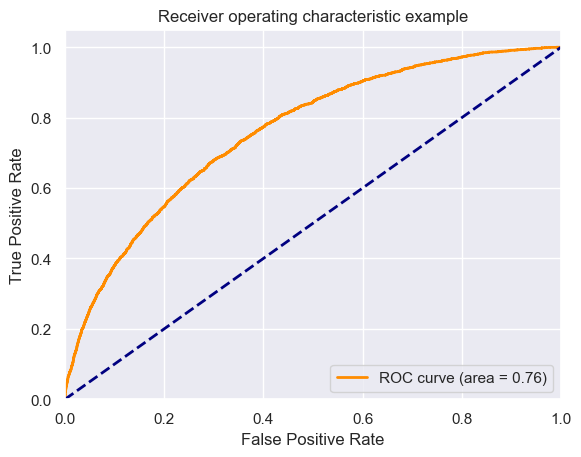

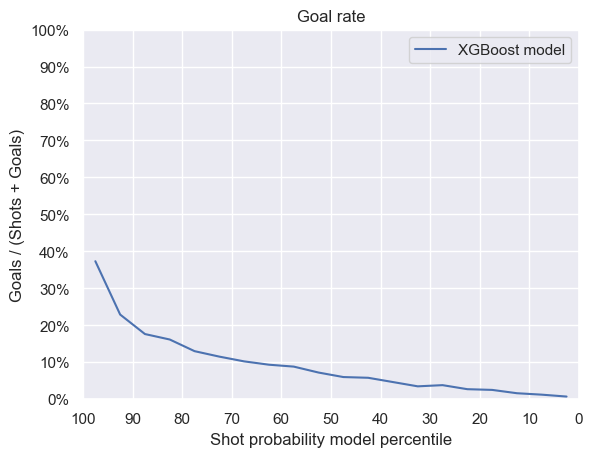

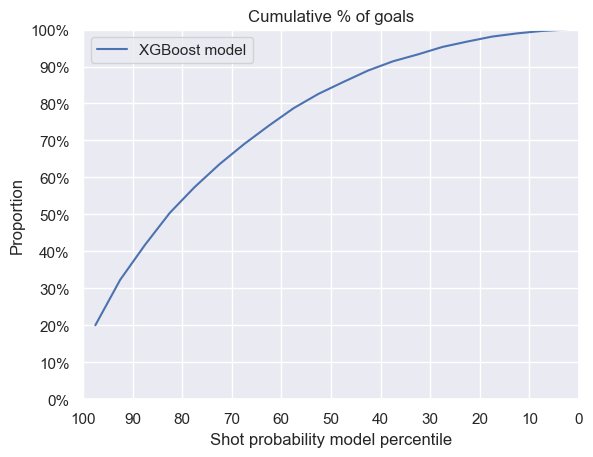

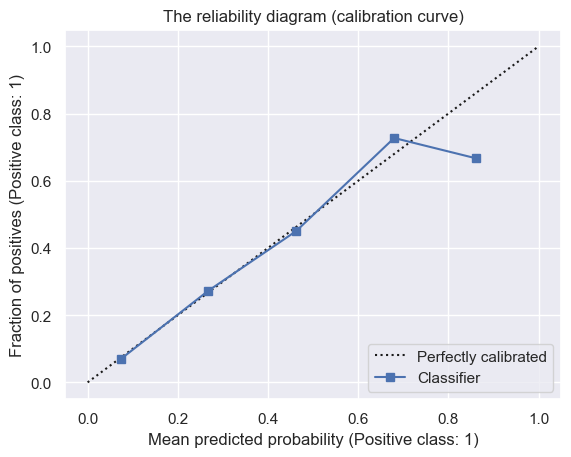

In [31]:
# 3.2 retrain XGBoost model with selected features

df_selected_l = pd.concat([df_selected, label], axis=1)

xgb_model = XGBClassifier(booster='dart', eta=0.05, eval_metric='auc', max_depth=10, objective='binary:logistic', seed=1337, subsample=0.5)

xgboost_model, roc_auc = train_xgboost(df_selected_l, ['all'], xgb_model)

In [ ]:
# save model and log to comet.ml
model_path = "xgboost_best.json"
xgboost_model.save_model(model_path)

log_to_comet(model_path, roc_auc)